In [2]:
import cv2
import os
import pandas as pd
import torch

In [3]:
src = "../../data/"
os.listdir(src)

['r1.txt',
 'r1.mp4',
 'information.xlsx',
 'annotation',
 'videos',
 'feature_ext',
 'tmp_images']

In [4]:
info_file = "../../data/information.xlsx"
f = pd.read_excel(info_file)

In [5]:
f[f["mode"] == "test"]

,filename,annotaionfile,rule,stage,weapon,勝敗,mode,time
0,r2.mp4,r2.txt,hoko,arowana,r,1,test,05:00:00
6,r1.mp4,r1.txt,eria,sumeshi,r,1,test,02:18:00
8,r10.mp4,r10.txt,yagura,fizitubo,r,0,test,05:36:00
15,r17.mp4,r17.txt,nawabari,ama,rb,1,test,03:35:00
19,r21.mp4,r21.txt,asari,mozuku,rb,1,test,03:55:00


In [6]:
net = "vgg"
path = os.path.join("../../data/feature_ext/", net, "r2.pth")

In [7]:
feature = torch.load(path)

In [90]:
import sys
sys.path.append('../../')

In [91]:
from src.models.image_model.featModel import featModel

In [95]:
feat_model = featModel()
model_path = "../../models/vgg"
model_name = "vgg_feat_06493908650124272.pth"
def load_model(feat_model, model_path, model_name):
    feat_model.load_state_dict(torch.load(os.path.join(model_path, model_name)))
load_model(feat_model, model_path, model_name)
feat_model.eval()


featModel(
  (classifier): classifier(
    (AdaptivePool): AdaptiveAvgPool2d(output_size=(8, 8))
    (conv1): Sequential(
      (0): Conv2d(512, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (conv2): Sequential(
      (0): Conv2d(100, 10, kernel_size=(1, 1), stride=(1, 1))
      (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (fc): Sequential(
      (0): Linear(in_features=640, out_features=100, bias=True)
      (1): ReLU(inplace=True)
    )
    (fc2): Linear(in_features=100, out_features=11, bias=True)
  )
)

In [12]:
output = model(feature[0:10])
output = torch.argmax(output, axis = 1)

In [13]:
from src.models.image_model import utils
[utils.id_to_label(i) for i in output.detach().numpy()]

['opening',
 'opening',
 'opening',
 'opening',
 'opening',
 'opening',
 'opening',
 'opening',
 'opening',
 'opening']

In [26]:
img_path = "../../data/tmp_images/r2"
images = sorted(os.listdir(img_path))

In [27]:
video_path = "../../data/videos/r2.mp4"

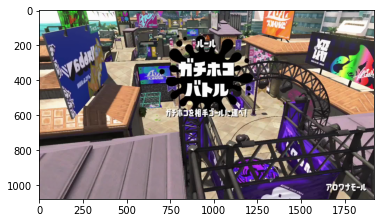

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread(os.path.join(img_path,images[0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

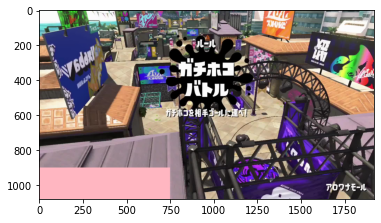

In [62]:
img2 = cv2.rectangle(img, (0, 1280), (750, 900), (255, 182, 193), thickness=-1)
plt.imshow(img2)
plt.show()

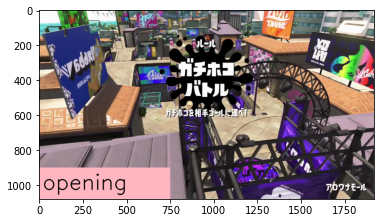

In [63]:
img3 = cv2.putText(img2, 'opening', (20, 1025), cv2.FONT_HERSHEY_SIMPLEX, 4, (0, 0, 0), thickness = 5)
plt.imshow(img3)
plt.show()

In [64]:
img.shape

(1080, 1920, 3)

In [97]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn
transform = transforms.Compose(
        [
            transforms.ToPILImage(),
            transforms.Resize((256,256)),
            # transforms.CenterCrop(224),
            transforms.ToTensor(),
            # transforms.RandomHorizontalFlip(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
    )
transform(img).shape

torch.Size([3, 256, 256])

In [115]:
base_model = models.vgg16(pretrained=True)
total_model = nn.Sequential(base_model.features, feat_model)
input_tensor = transform(img).unsqueeze(0)
output = total_model(input_tensor).argmax(axis = 1)
#print(base_model.features(input_tensor).shape)
#feature = feat_model(input_tensor)

In [116]:
output

tensor([0])

In [1]:
import pandas as pd
import pickle
with open("test.pkl", "rb") as f:
    file = pickle.load(f)

import sys
sys.path.append('../../')
from src.models.image_model import utils
output = [utils.id_to_label(i) for i in file]

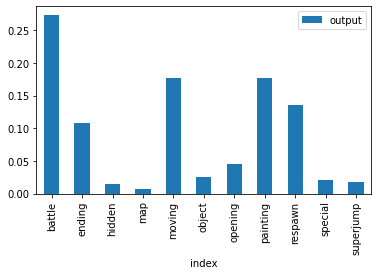

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.subplot.bottom'] = 0.23
df = pd.DataFrame({"output":output}).output.value_counts().reset_index().sort_values("index").set_index("index")
df.output = df.output/df.output.sum()
df.plot(kind = "bar")
plt.savefig("test.jpg")

In [7]:
df

,index,output
0,battle,6696
1,moving,4323
2,painting,4322
3,respawn,3329
4,ending,2666
5,opening,1099
6,object,624
7,special,511
8,superjump,439
9,hidden,373
